In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [20]:
df = pd.read_csv("emp_attriction.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<Axes: >

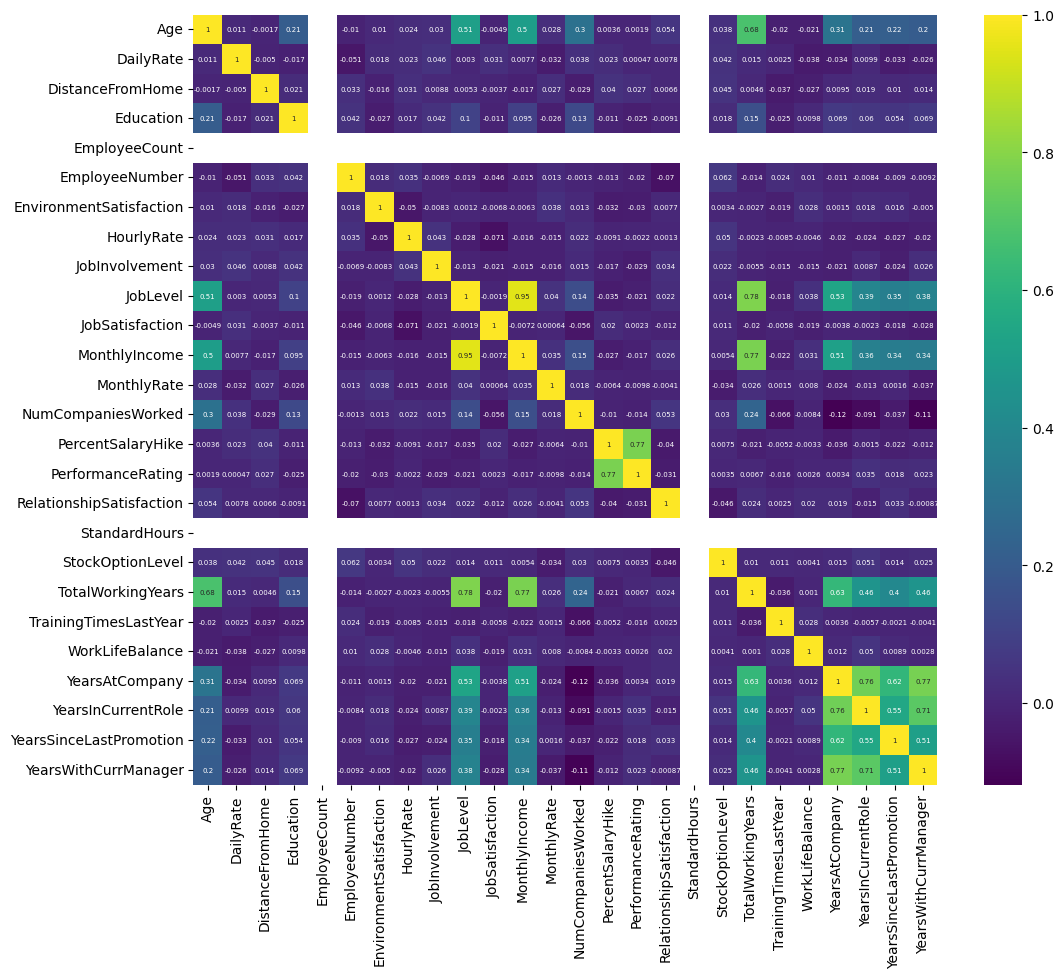

In [17]:
numer_df = df.select_dtypes(include='number')
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(numer_df.corr(), annot=True, cmap='viridis',annot_kws={"size": 5})


In [22]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Convert all boolean columns in the DataFrame to 1/0
df_encoded = df_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(df_encoded.drop('Attrition', axis=1))
y = df_encoded["Attrition"]

<Axes: ylabel='Attrition'>

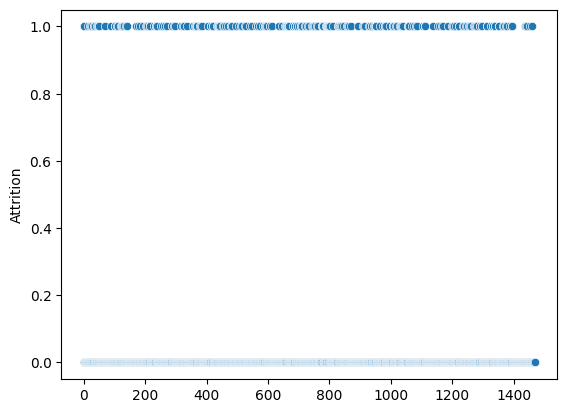

In [31]:
sns.scatterplot(y)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=69)

In [44]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
print("Classificatin Report")
print(classification_report(y_test,y_pred))

Classificatin Report
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       354
           1       0.79      0.36      0.49        87

    accuracy                           0.85       441
   macro avg       0.83      0.67      0.70       441
weighted avg       0.85      0.85      0.83       441



In [48]:
grid = {
    'C':[1,0.001,0.1,100,1000,0.0001],
    'penalty':['l1','l2'],
    'solver':['lbfgs', 'liblinear'],
    'max_iter':[100,200,300,1000]
}
model2 = LogisticRegression()
grid_search = GridSearchCV(model2,grid)

In [49]:
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
print("Classification report")
print(classification_report(y_test,y_pred))
print(grid_search.best_params_)

Classification report
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       354
           1       0.84      0.31      0.45        87

    accuracy                           0.85       441
   macro avg       0.85      0.65      0.68       441
weighted avg       0.85      0.85      0.82       441

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages